# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Datasets

In [124]:
df = pd.read_csv('/Users/kellylam/Glassdoor/Data/Glassdoor_clean_data.csv')
skills = pd.read_csv('/Users/kellylam/Glassdoor/Data/skill_count_output.csv')

In [4]:
df.head()

,Job Title,Company,Rating,Location,City,State,Salary Estimate,Min Salary (Thousands),Max Salary (Thousands),Average Salary (Thousands),Size,Industry,Job Description
0,Data Analyst,Bell Partners,0.0,"Raleigh, NC",Raleigh,NC,$40K - $73K (Glassdoor est.),40,73,56.5,1001 to 5000 Employees,Real Estate,Data Analyst\nCorporate Headquarters\n12575 Ul...
1,Data Analyst,Uline,3.6,"Pleasant Prairie, WI",Pleasant Prairie,WI,$65K - $79K (Employer est.),65,79,72.0,5001 to 10000 Employees,NaN,Data Analyst\nCorporate Headquarters\n12575 Ul...
2,Data Analyst (South of Milwaukee),Uline,3.6,"Milwaukee, WI",Milwaukee,WI,$65K - $79K (Employer est.),65,79,72.0,5001 to 10000 Employees,NaN,Data Analyst\nCorporate Headquarters\n12575 Ul...
3,Operations Data Analyst,Plante Moran,0.0,"Kalamazoo, MI",Kalamazoo,MI,$36K - $62K (Glassdoor est.),36,62,49.0,1001 to 5000 Employees,Accounting & Legal,Make your mark. With more than $17.2 billion o...
4,Data Analyst,Sperry Rail Inc.,2.7,"Olathe, KS",Olathe,KS,$40K - $69K (Glassdoor est.),40,69,54.5,201 to 500 Employees,Transportation & Logistics,"Data Analyst I: Based in Olathe, Ks. This is a..."


In [5]:
skills.head()

,Skill,Count
0,sql,448
1,regression,33
2,time series,11
3,statistics,213
4,computer science,222


### number of unique companies

In [10]:
df.shape[0]

891

In [9]:
num_uniq_companies = df['Company'].nunique()
num_uniq_companies # out of 891

532

### barchart of companies w the most listings

In [110]:
df['Company'].value_counts()

Uline                            12
Intuit - Data                     7
Forfeiture Support Associates     6
MassMutual                        6
Citi                              6
                                 ..
Ingenium Talent                   1
Point72                           1
Teqqi                             1
Bon Secours Mercy Health          1
Accelerated Innovators            1
Name: Company, Length: 532, dtype: int64

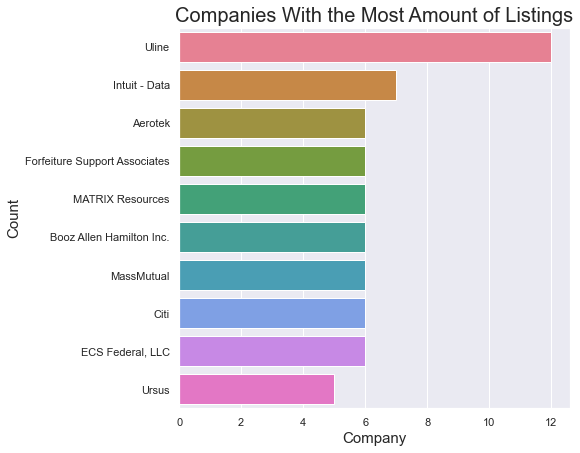

In [45]:
# Adjusting size of plot
plt.figure(figsize=(7,7))
sns.set_theme()

# Graphing the plot
ax = sns.countplot(y = 'Company', data = df, order = df.Company.value_counts().iloc[:10].index, palette = 'husl')
plt.title('Companies With the Most Amount of Listings', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### unqiue job titles? senior/sr, staff, entry ?

In [47]:
titles = df['Job Title'].unique()
titles

array(['Data Analyst', 'Data Analyst (South of Milwaukee)',
       'Operations Data Analyst', 'Tactical Data Link (TDL) Analyst-',
       'Data Standard Analyst - Biostatistics Team',
       'Data Warehouse Analyst', 'HR Systems & Data Analyst',
       'IS Data Analyst Intermediate', 'Business Analyst - Data Science',
       'Contract Data Analyst', 'Data Operations Analyst',
       'Lead Data Analyst', 'Regulatory Affairs Data Analyst',
       'Data Analyst (North of Chicago)',
       'Supply Chain Data Analyst (South of Milwaukee)',
       'Market Data Analyst', 'Data Science Analyst - RH',
       'Business Analyst - Claim and Data Analyst',
       'Senior Healthcare Data Analyst',
       'E-Commerce Marketing Data Analyst',
       'Quality Assurance Analyst - Data Warehouse ETL (South of Milwaukee)',
       'ERP Analyst, Data Conversion', 'Data Governance Analyst',
       'Data Analyst I', 'Business Data Analyst', 'USMTF Data Analyst',
       'ETL/ Data Warehouse Test Analyst',
    

Senior, Sr., Jr., Internship, Associate, Junior, Mid-Level, Manager

In [195]:
def get_seniority(job_title):
    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'manager' in job_title.lower():
            return 'senior'
    elif 'jr.' in job_title.lower() or 'junior' in job_title.lower() or 'associate' in job_title.lower():
        return 'junior'
    elif 'internship'in job_title.lower() or 'intern' in job_title.lower():
        return 'intern'
    else:
        return 'mid-level'

In [198]:
df['seniority'] = df['Job Title'].apply(get_seniority)
df['seniority']

0      mid-level
1      mid-level
2      mid-level
3      mid-level
4      mid-level
         ...    
886    mid-level
887    mid-level
888    mid-level
889    mid-level
890       senior
Name: seniority, Length: 891, dtype: object

In [199]:
df['seniority'].value_counts()

mid-level    821
senior        61
junior         6
intern         3
Name: seniority, dtype: int64

### salary by experience

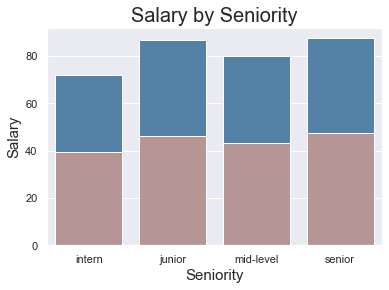

In [228]:
# Graphing the plot
ax = sns.barplot(x='seniority', y='Max Salary (Thousands)', data = df, order = ['intern', 'junior', 'mid-level', 'senior'], ci = None, color = 'steelblue') 
ax = sns.barplot(x='seniority', y='Min Salary (Thousands)', data = df, order = ['intern', 'junior', 'mid-level', 'senior'], ci = None, color = 'rosybrown') 
plt.title('Salary by Seniority', fontsize = 20)
plt.xlabel('Seniority', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

plt.show()

### barchart of state

In [82]:
df['State'].nunique()

47

In [125]:
df['State'].unique()

array([' NC', ' WI', ' MI', ' KS', ' VA', ' IL', ' NE', ' OH', ' TX',
       ' MA', ' GA', ' NY', ' IN', ' CA', ' PA', ' FL', ' MD', ' NJ',
       ' MN', ' AZ', ' CO', ' AL', ' UT', ' PR', ' DC', nan, ' MS', ' OR',
       ' MO', ' RI', ' CT', ' IA', ' SC', ' WA', ' NH', ' DE', ' ID',
       ' KY', ' NM', ' LA', ' WV', ' MT', ' VT', ' TN', ' Mercer',
       ' Arapahoe', ' AR', ' St. Louis'], dtype=object)

Looks like St. Louis, Merce, and Arapahoe seeped through our cleaning

In order to fix this mistake we need to see which rows contains those values. Turns out that when we initially split the Location, there were trailing white spaces. We will get rid of the white spaces and see which states they actually belong to.

In [126]:
df['State'] = df['State'].str.lstrip()
df['State']

0      NC
1      WI
2      WI
3      MI
4      KS
       ..
886    WA
887    CO
888    VA
889    NJ
890    VA
Name: State, Length: 891, dtype: object

In [127]:
df[df['State'].isin(['St. Louis', 'Mercer', 'Arapahoe'])]

,Job Title,Company,Rating,Location,City,State,Salary Estimate,Min Salary (Thousands),Max Salary (Thousands),Average Salary (Thousands),Size,Industry,Job Description
655,Data Analyst,Dextro Software Systems,3.5,"Princeton Junction, Mercer, NJ",Princeton Junction,Mercer,$65K - $70K (Employer est.),65,70,67.5,51 to 200 Employees,Information Technology,"Job Title: Data Analyst\nLocation: Princeton, ..."
677,Data Analyst,ClientSolv Technologies,3.5,"Greenwood Village, Arapahoe, CO",Greenwood Village,Arapahoe,$44K - $80K (Glassdoor est.),44,80,62.0,51 to 200 Employees,Information Technology,Company Description\n\nClientSolv Technologies...
704,Data Analyst,ClientSolv Technologies,3.5,"Greenwood Village, Arapahoe, CO",Greenwood Village,Arapahoe,$51K - $94K (Glassdoor est.),51,94,72.5,51 to 200 Employees,Information Technology,Company Description\n\nClientSolv Technologies...
775,Data Analyst,Weekends Only Furniture & Mattress,3.2,"Webster Groves, St. Louis, MO",Webster Groves,St. Louis,$37K - $78K (Glassdoor est.),37,78,57.5,201 to 500 Employees,Retail,"Data Analyst\nSt. Louis, MO\n\nWeekends Only i..."
821,Data Analyst,Dextro Software Systems,3.5,"Princeton Junction, Mercer, NJ",Princeton Junction,Mercer,$28K - $51K (Glassdoor est.),28,51,39.5,51 to 200 Employees,Information Technology,"Job Title: Data Analyst\nLocation: Princeton, ..."


In [265]:
# Replace state with correct values
df['State'].replace('Mercer', 'NJ', inplace = True)
df['State'].replace('Arapahoe', 'CO', inplace = True)
df['State'].replace('St. Louis', 'MO', inplace = True)

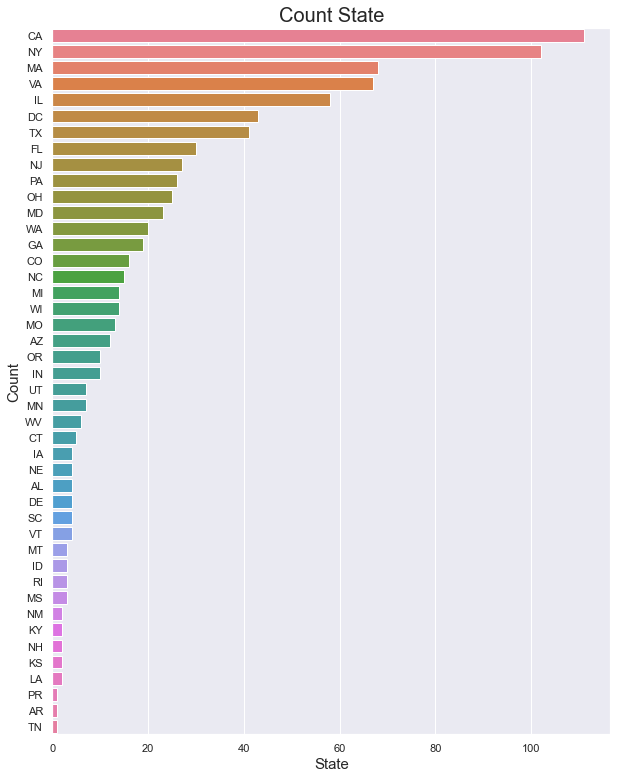

In [107]:
# Adjusting size of plot
plt.figure(figsize=(10,13))
sns.set_theme()

# Graphing the plot
ax = sns.countplot(y = 'State', data = df, order = df.State.value_counts().index, palette = 'husl')
plt.title('Count State', fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### barchart of city

In [108]:
df['City'].nunique()

279

In [109]:
df['City'].value_counts()

New York              78
Washington            43
Boston                36
Chicago               28
Remote                23
                      ..
Orlando                1
Ankeny                 1
Carson                 1
Whitehouse Station     1
Franklin               1
Name: City, Length: 279, dtype: int64

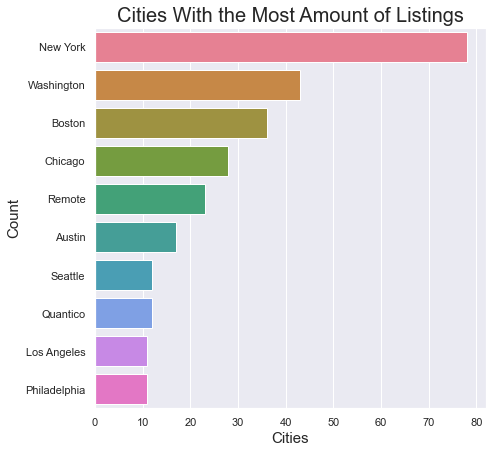

In [111]:
# Adjusting size of plot
plt.figure(figsize=(7,7))

# Graphing the plot
ax = sns.countplot(y = 'City', data = df, order = df.City.value_counts().iloc[:10].index, palette = 'husl')
plt.title('Cities With the Most Amount of Listings', fontsize = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### map

### histogram of rating

In [141]:
df['Rating'].unique()

array([nan, 3.6, 2.7, 4.4, 4. , 3. , 2.9, 2.3, 3.3, 3.7, 3.4, 4.1, 3.8,
       3.5, 3.9, 4.5, 5. , 2.8, 4.9, 3.2, 4.3, 2.4, 4.2, 4.8, 2.6, 4.7,
       4.6, 3.1, 2.2, 2.5, 1.9])

Mean value for Rating: 3.80110565110565


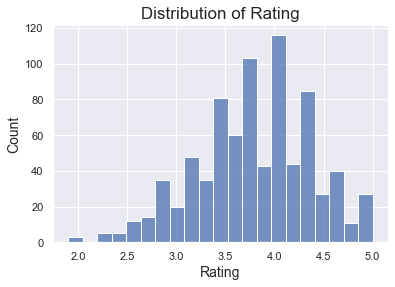

In [193]:
print("Mean value for Rating:", df['Rating'].mean())

sns.histplot(data = df, x = 'Rating', palette = 'steelblue')
plt.title("Distribution of Rating", fontsize = 17)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

### barchart size

In [144]:
df['Size'].unique()

array(['1001 to 5000 Employees', '5001 to 10000 Employees',
       '201 to 500 Employees', '501 to 1000 Employees',
       '51 to 200 Employees', '10000+ Employees', 'Unknown', nan,
       '1 to 50 Employees'], dtype=object)

In [153]:
df['Size'].replace(np.nan, 'Unknown', inplace = True)

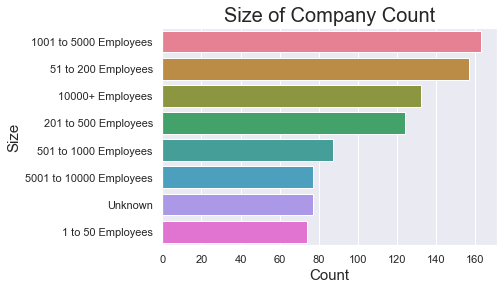

In [178]:
# Graphing the plot
ax = sns.countplot(y = 'Size', data = df, order = df.Size.value_counts().index, palette = 'husl')
plt.title('Size of Company Count', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Size', fontsize = 15)
 
plt.show()

### barchart industry

In [179]:
df['Industry'].unique()

array(['Real Estate', nan, 'Accounting & Legal',
       'Transportation & Logistics', 'Information Technology',
       'Health Care', 'Business Services', 'Biotech & Pharmaceuticals',
       'Finance', 'Arts, Entertainment & Recreation', 'Insurance',
       'Non-Profit', 'Manufacturing', 'Telecommunications',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Retail', 'Oil, Gas, Energy & Utilities', 'Media',
       'Consumer Services', 'Education', 'Government', 'Travel & Tourism',
       'Restaurants, Bars & Food Services'], dtype=object)

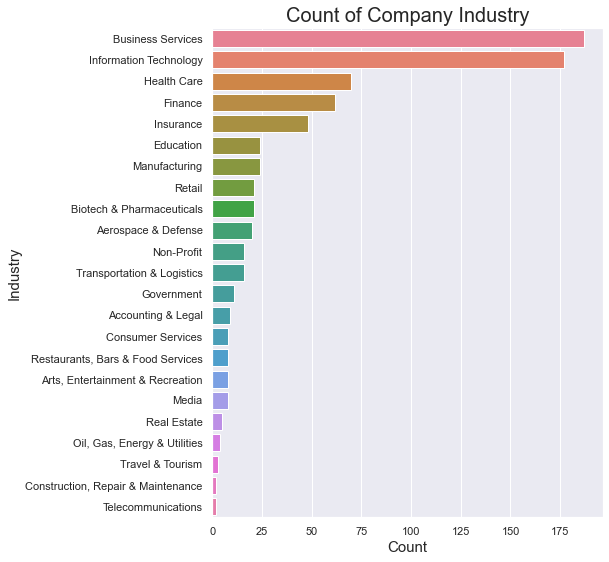

In [181]:
plt.figure(figsize=(7,9))

ax = sns.countplot(y = 'Industry', data = df, order = df.Industry.value_counts().index, palette = 'husl')
plt.title('Count of Company Industry', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Industry', fontsize = 15)
 
plt.show()

### histogram of salary

Mean value for Min Salary: 43.64870931537598
Mean value for Max Salary: 80.6026936026936


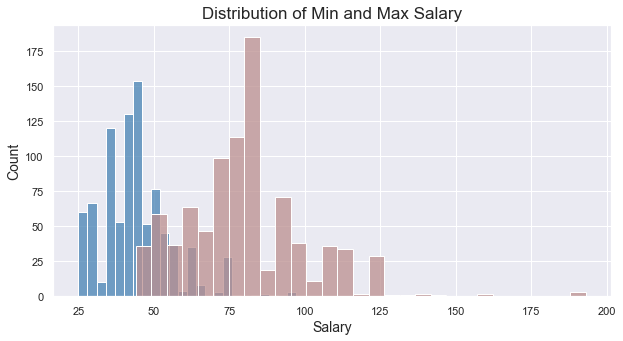

In [191]:
print("Mean value for Min Salary:", df['Min Salary (Thousands)'].mean())
print("Mean value for Max Salary:", df['Max Salary (Thousands)'].mean())

fig = plt.figure(figsize = (10,5))

sns.histplot(data = df, x = 'Min Salary (Thousands)', color = 'steelblue')
sns.histplot(data = df, x = 'Max Salary (Thousands)', color = 'rosybrown')

plt.title("Distribution of Min and Max Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

Mean value for Avg Salary: 62.125701459034794


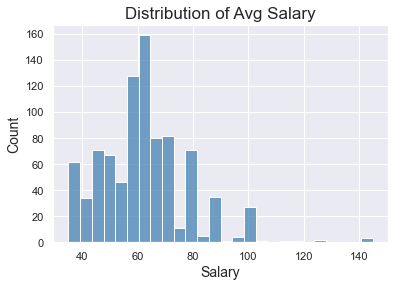

In [192]:
print("Mean value for Avg Salary:", df['Average Salary (Thousands)'].mean())

sns.histplot(data = df, x = 'Average Salary (Thousands)', color = 'steelblue')

plt.title("Distribution of Avg Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

### box plot of salary

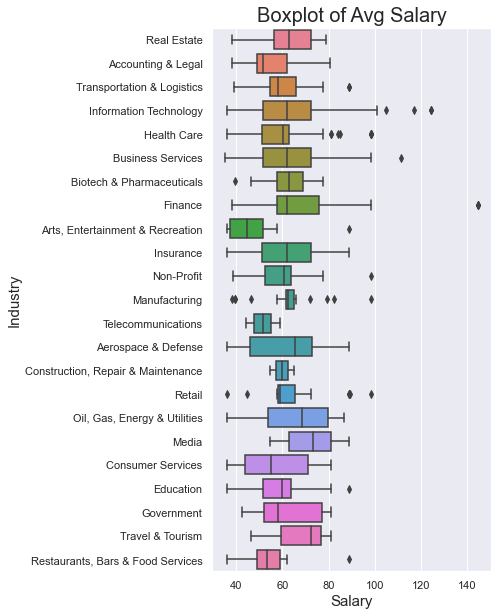

In [232]:
fig = plt.figure(figsize = (5,10))

sns.boxplot(x = 'Average Salary (Thousands)', y = 'Industry', data = df, palette = 'husl')

plt.title("Boxplot of Avg Salary", fontsize = 20)
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Industry', fontsize = 15)

plt.show()

### min max stack per city

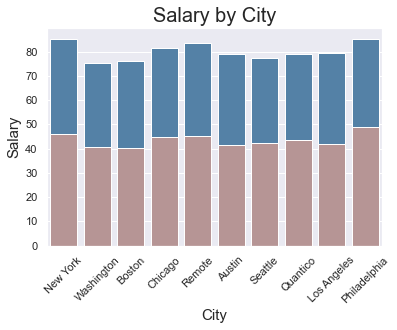

In [240]:
# Graphing the plot
ax = sns.barplot(x='City', y='Max Salary (Thousands)', data = df, order = df.City.value_counts().iloc[:10].index, ci = None, color = 'steelblue') 
ax = sns.barplot(x='City', y='Min Salary (Thousands)', data = df, order = df.City.value_counts().iloc[:10].index, ci = None, color = 'rosybrown') 

plt.xticks(rotation=45)
plt.title('Salary by City', fontsize = 20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

plt.show()

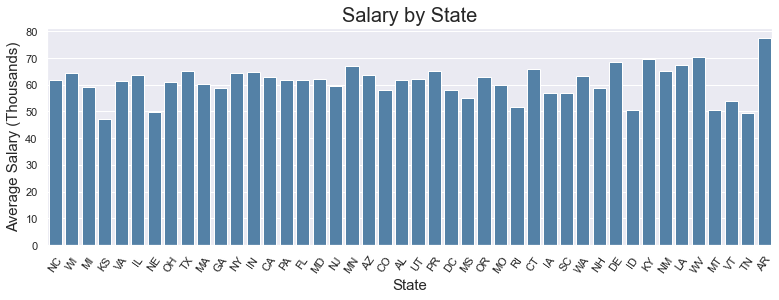

In [271]:
fig = plt.figure(figsize=(13,4))

ax = sns.barplot(x='State', y='Average Salary (Thousands)', data = df, ci = None, color = 'steelblue') 

plt.xticks(rotation=55)
plt.title('Salary by State', fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Average Salary (Thousands)', fontsize = 15)

plt.show()

### correlation between rating and salary?

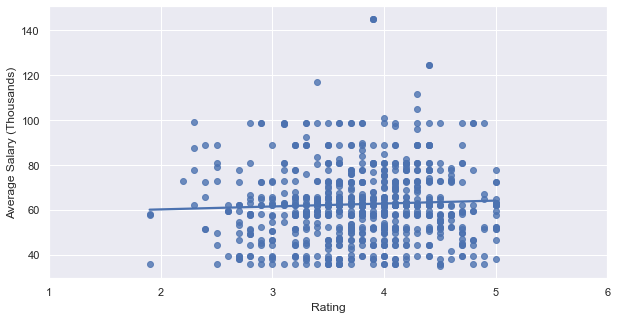

In [244]:
fig = plt.figure(figsize = (10, 5))

ax = sns.regplot(x = 'Rating', y = 'Average Salary (Thousands)', data = df, ci = None)
ax.set_xlim(1, 6)
# plt.title("Correlation Between Energy and Loudness", fontsize = 17)
# plt.xlabel('Energy', fontsize = 14)
# plt.ylabel('Loudness', fontsize = 14)

plt.show()

### salary by state, avg

### top paying industry

### top paying company